In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Chapter 10 Lab 2: Clustering
### 10.5.1 K-Means Clustering

We begin with a simple simulated example in which there truly are two clusters in the
data: the first 25 observations have a mean shift relative to the next 25
observations.


Text(0, 0.5, 'X2')

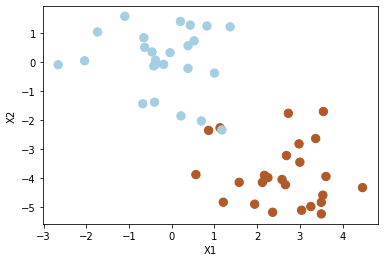

In [2]:
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4
# plotting the two groups
plt.scatter(X[:,0], X[:,1], s=70, c= np.repeat([1,-1], 25), cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

We now perform K-means clustering with K = 2.
The cluster assignments of the 50 observations are contained in
kmeans.labels_

In [3]:
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X)
kmeans2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

The K-means clustering separated well the observations into two clusters even though we did not supply any group information to kmeans(). We
can plot the data, with each observation colored according to its cluster
assignment.

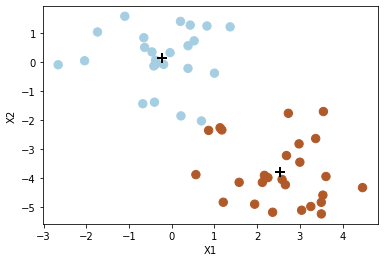

In [4]:
plt.scatter(X[:,0], X[:,1], s=70, c= kmeans2.labels_, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

Here the observations can be easily plotted because they are two-dimensional.
If there were more than two variables then we could instead perform PCA
and plot the first two principal components score vectors.
In this example, we knew that there really were two clusters because
we generated the data. However, for real data, in general we do not know
the true number of clusters. We could instead have performed K-means
clustering on this example with K = 3.

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2], dtype=int32)

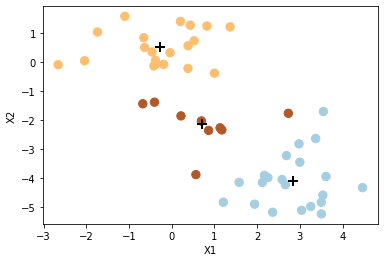

In [5]:
kmeans3 = KMeans(n_clusters=3, random_state=0, n_init=20).fit(X)
display(kmeans3.labels_)
plt.scatter(X[:,0], X[:,1], s=70, c= kmeans3.labels_, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)


To run the kmeans() function with multiple initial cluster assignments, we use the n_init argument. If a value of n_init greater than one
is used, then K-means clustering will be performed using multiple random
assignments in Step 1 of Algorithm 10.1, and the kmeans() function will
report only the best results. Here we compare using n_init=1 to n_init=20.

In [6]:
display("The sum of squared distances from cluster centers:")
display("K=2:", kmeans2.inertia_)
display("K=3:", kmeans3.inertia_)

'The sum of squared distances from cluster centers:'

'K=2:'

99.30578397914687

'K=3:'

68.97379200939724

Note that kmeams.inertia_ is the total within-cluster sum of squares,
which we seek to minimize by performing K-means clustering (Equation
10.11).
We strongly recommend always running K-means clustering with a large
value of n_init, such as 20 or 50, since otherwise an undesirable local
optimum may be obtained.
When performing K-means clustering, in addition to using multiple initial cluster assignments, it is also important to set a random seed using the
random_state() function. This way, the initial cluster assignments in Step 1 can
be replicated, and the K-means output will be fully reproducible.

### 10.5.2 Hierarchical Clustering

 In the fol- hclust() lowing example we use the data from Section 10.5.1 to plot the hierarchical
clustering dendrogram using complete, single, and average linkage clustering, with Euclidean distance as the dissimilarity measure. We begin by
clustering observations using complete linkage

Text(0.5, 1.0, 'Complete Linkage')

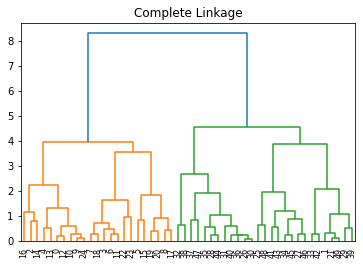

In [7]:
# from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model,**kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

    # setting distance_threshold=0 ensures we compute the full tree.
model1 = AgglomerativeClustering(compute_distances= True,compute_full_tree=True, n_clusters=None, distance_threshold=0, linkage = 'complete')
model1 = model1.fit(X)
plot_dendrogram(model1)
plt.title("Complete Linkage")

We could just as easily perform hierarchical clustering with average or
single linkage instead

Text(0.5, 1.0, 'Single Linkage')

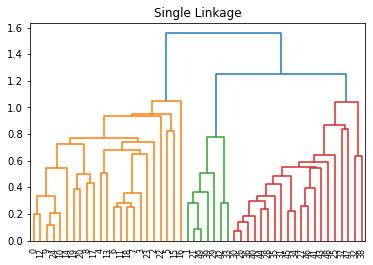

In [8]:
model2 = AgglomerativeClustering(compute_distances= True,compute_full_tree=True, n_clusters=None, distance_threshold=0, linkage = 'single')
model2 = model2.fit(X)
plot_dendrogram(model2)
plt.title("Single Linkage")

Text(0.5, 1.0, 'Average Linkage')

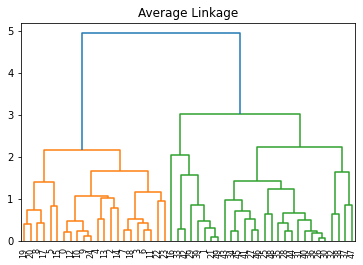

In [9]:
model3 = AgglomerativeClustering(compute_distances= True,compute_full_tree=True, n_clusters=None, distance_threshold=0, linkage = 'average')
model3 = model3.fit(X)
plot_dendrogram(model3)
plt.title("Average Linkage")

To determine the cluster labels for each observation associated with a
given cut of the dendrogram, we can use the fit_predict() function

In [10]:
display("Complete linkage")
model1 = AgglomerativeClustering(compute_distances= True,compute_full_tree=True, n_clusters=2, linkage = 'complete')
display(model1.fit_predict(X))

display("Single linkage") 
model2 = AgglomerativeClustering(compute_distances= True,compute_full_tree=True, n_clusters=2, linkage = 'single')
display(model2.fit_predict(X))

display("Average linkage")

model3 = AgglomerativeClustering(compute_distances= True,compute_full_tree=True, n_clusters=2, linkage = 'average')
display(model3.fit_predict(X))


'Complete linkage'

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

'Single linkage'

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

'Average linkage'

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

### 10.6 Lab 3: NCI60 Data Example

Unsupervised techniques are often used in the analysis of genomic data.
In particular, PCA and hierarchical clustering are popular tools. We illustrate these techniques on the NCI60 cancer cell line microarray data, which
consists of 6,830 gene expression measurements on 64 cancer cell lines.

Each cell line is labeled with a cancer type. We do not make use of the
cancer types in performing PCA and clustering, as these are unsupervised
techniques. But after performing PCA and clustering, we will check to
see the extent to which these cancer types agree with the results of these
unsupervised techniques.
The data has 64 rows and 6,830 columns


In [11]:
X = pd.read_csv('Data/NCI60_X.csv', index_col=0)
y = pd.read_csv('Data/NCI60_y.csv', index_col=0)
display(X)
display(y)

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V60,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,-0.400019,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
V61,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,-0.560020,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
V62,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.160020,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000
V63,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,0.889980,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000


,x
1,CNS
2,CNS
3,CNS
4,RENAL
5,BREAST
...,...
60,MELANOMA
61,MELANOMA
62,MELANOMA
63,MELANOMA


We begin by examining the cancer types for the cell lines

In [12]:
y.value_counts()

x          
NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
K562A-repro    1
K562B-repro    1
MCF7A-repro    1
MCF7D-repro    1
UNKNOWN        1
dtype: int64

### 10.6.1 PCA on the NCI60 Data
We first perform PCA on the data after scaling the variables (genes) to
have standard deviation one, although one could reasonably argue that it
is better not to scale the genes.

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, index=X.index, columns=X.columns)

We now plot the first few principal component score vectors, in order to
visualize the data. The observations (cell lines) corresponding to a given
cancer type will be plotted in the same color, so that we can see to what
extent the observations within a cancer type are similar to each other.

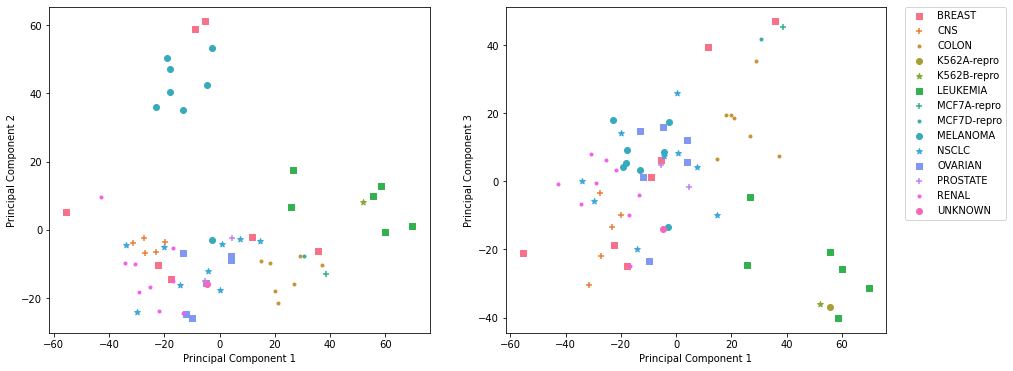

In [14]:
from sklearn import preprocessing
import seaborn as sns
import itertools

le = preprocessing.LabelEncoder()
model = PCA()
results = model.fit_transform(X)
marker1 = itertools.cycle((',', '+', '.', 'o', '*'))
marker2 = itertools.cycle((',', '+', '.', 'o', '*'))
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
clrs = sns.color_palette('husl', n_colors=len(np.unique(y)))  # a list of RGB tuples

for i,label in enumerate(np.unique(y)):
    ax1.scatter(results[y.x.ravel()==label, 0], results[y.x.ravel()==label, 1], label=label, color = clrs[i], marker = next(marker1))
    ax2.scatter(results[y.x.ravel()==label, 0], results[y.x.ravel()==label, 2], label=label, color = clrs[i], marker = next(marker2))

ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 3')
ax2.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

On the whole, cell lines
corresponding to a single cancer type do tend to have similar values on the
first few principal component score vectors. This indicates that cell lines
from the same cancer type tend to have pretty similar gene expression
levels.
We can obtain a summary of the proportion of variance explained (PVE)
of the first few principal components:

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6830] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [51] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


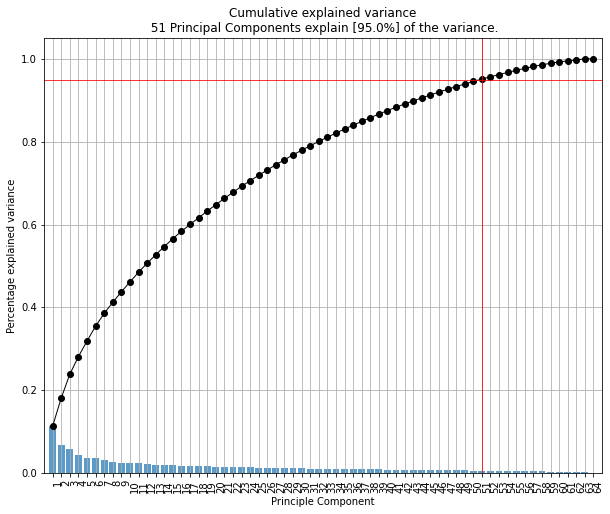

<Figure size 432x288 with 0 Axes>

In [15]:
from pca import pca
model = pca()
results = model.fit_transform(X)
fig, ax = model.plot()

 We see that together, the first seven principal components
explain around 40 % of the variance in the data. This is not a huge amount
of the variance. However, looking at the scree plot, we see that while each
of the first seven principal components explain a substantial amount of
variance, there is a marked decrease in the variance explained by further
principal components. That is, there is an elbow in the plot after approximately the seventh principal component. This suggests that there may
be little benefit to examining more than seven or so principal components
(though even examining seven principal components may be difficult).

### 10.6.2 Clustering the Observations of the NCI60 Data

We now proceed to hierarchically cluster the cell lines in the NCI60 data,
with the goal of finding out whether or not the observations cluster into
distinct types of cancer. We have already standardized our dataset.. As mentioned earlier, this step is
optional and should be performed only if we want each gene to be on the same scale.

Text(0.5, 1.0, 'Average Linkage')

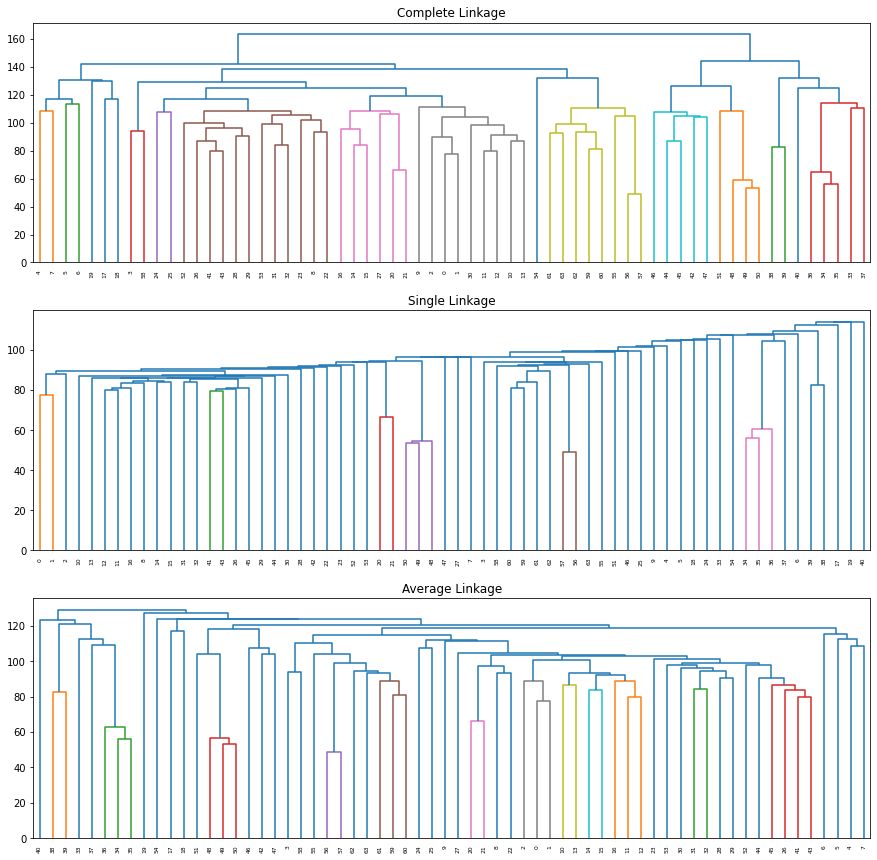

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,15) )

model1 = AgglomerativeClustering(compute_distances= True,compute_full_tree=True, n_clusters=None, distance_threshold=0, linkage = 'complete')
model1 = model1.fit(X)
plot_dendrogram(model1, ax= ax1)
ax1.set_title("Complete Linkage")

model2 = AgglomerativeClustering(compute_distances= True,compute_full_tree=True, n_clusters=None, distance_threshold=0, linkage = 'single')
model2 = model2.fit(X)
plot_dendrogram(model2, ax = ax2)
ax2.set_title("Single Linkage")

model = AgglomerativeClustering(compute_distances= True,compute_full_tree=True, n_clusters=None, distance_threshold=0, linkage = 'average')
model3 = model3.fit(X)
plot_dendrogram(model3, ax=ax3)
ax3.set_title("Average Linkage")

The results are shown above. We see that the choice of linkage
certainly does affect the results obtained. Typically, single linkage will tend
to yield trailing clusters: very large clusters onto which individual observations attach one-by-one. On the other hand, complete and average linkage
tend to yield more balanced, attractive clusters. For this reason, complete
and average linkage are generally preferred to single linkage. Clearly cell
lines within a single cancer type do tend to cluster together, although the lustering is not perfect. We will use complete linkage hierarchical clustering for the analysis that follows.
We can cut the dendrogram at the height that will yield a particular
number of clusters, say four:

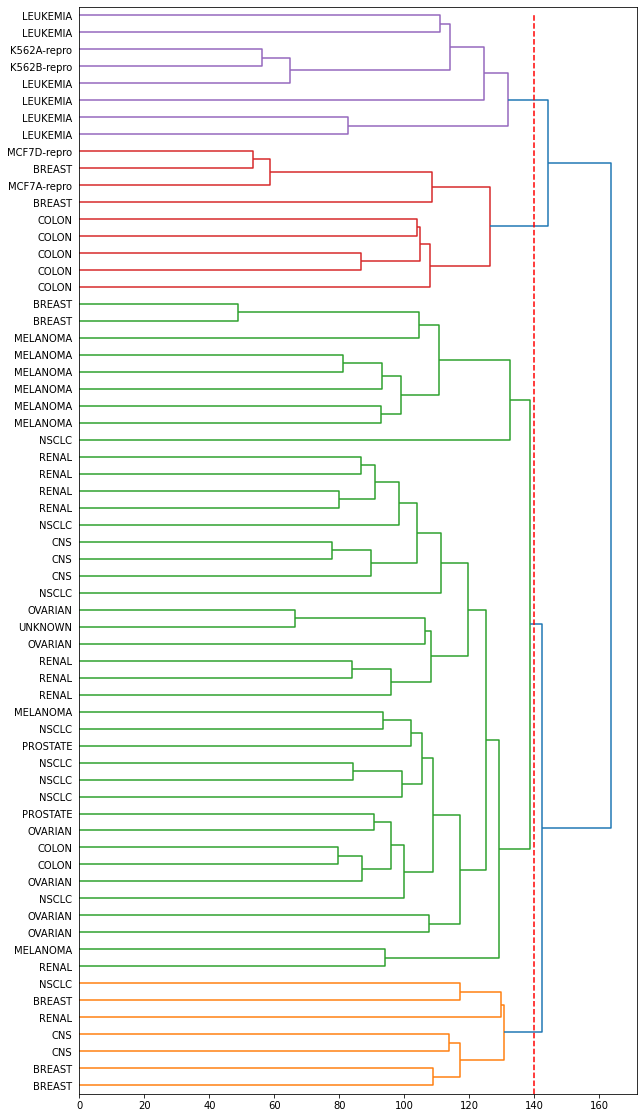

In [17]:
model1 = AgglomerativeClustering(compute_distances= True,compute_full_tree=True, n_clusters=None, distance_threshold=0, linkage = 'complete')
model1 = model1.fit(X)
plt.figure(figsize=(10,20))
plot_dendrogram(model1, orientation = 'right', labels=y.x.ravel(), leaf_font_size=10, color_threshold=140)
ax1.set_title("Complete Linkage, cut at 4 levels")
plt.vlines(140,0,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed')


There are some clear patterns. All the leukemia cell lines fall in cluster 3,
while the breast cancer cell lines are spread out over three different clusters.
We can plot the cut on the dendrogram that produces these four clusters.

We claimed earlier in Section 10.3.2 that K-means clustering and hierarchical clustering with the dendrogram cut to obtain the same number
of clusters can yield very different results. How do these NCI60 hierarchical
clustering results compare to what we get if we perform K-means clustering
with K = 4?

In [18]:
np.random.seed(2)
kmeans = KMeans(n_clusters=4, n_init=50)
kmeans.fit(X)

model = AgglomerativeClustering(compute_distances= True,compute_full_tree=True, n_clusters=4, linkage = 'complete')
model = model.fit(X)

pd.crosstab(kmeans.labels_, model.labels_, rownames=['kmeans'], colnames=['hclust'])

hclust,0,1,2,3
kmeans,,,,
0,0,8,0,0
1,16,0,0,7
2,15,0,9,0
3,9,0,0,0


We see that the four clusters obtained using hierarchical clustering and Kmeans clustering are somewhat different. Cluster 0 in K-means clustering is
identical to cluster 1 in hierarchical clustering. However, the other clusters differ: for instance, cluster 4 in K-means clustering contains a portion of
the observations assigned to cluster 0 by hierarchical clustering, as well as
all of the observations assigned to cluster 2 by hierarchical clustering.
Rather than performing hierarchical clustering on the entire data matrix,
we can simply perform hierarchical clustering on the first few principal
component score vectors, as follows:

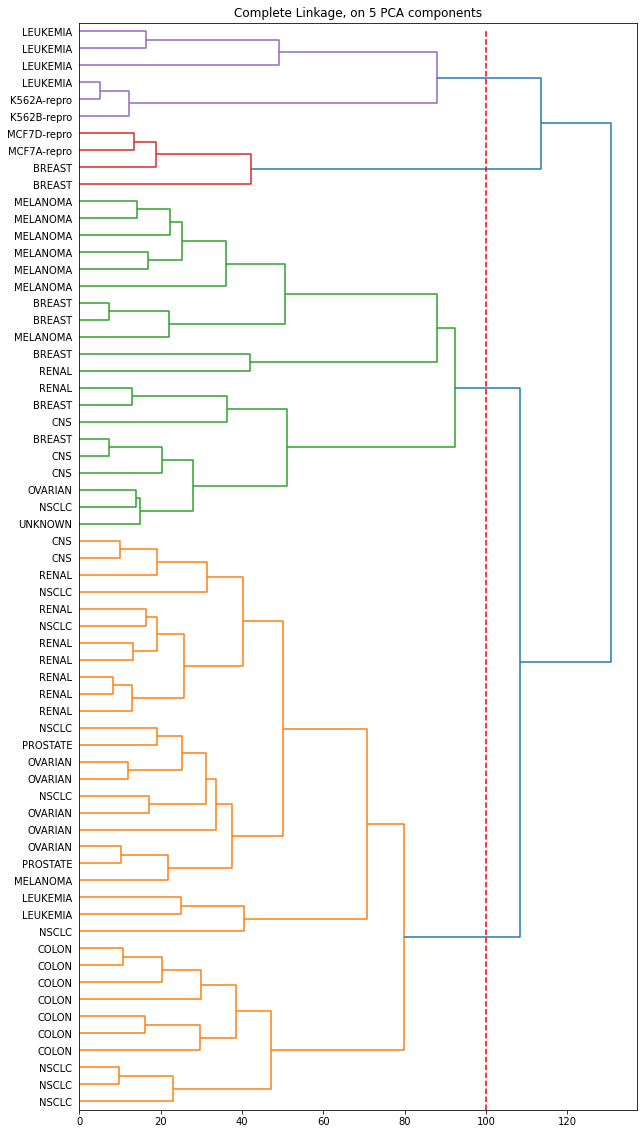

In [19]:
model2 = AgglomerativeClustering(compute_distances= True,compute_full_tree=True, n_clusters=4, linkage = 'complete')
pca = PCA()
pca_X = pca.fit_transform(X)
model2 = model2.fit(pca_X[:, 0:5])

plt.figure(figsize=(10,20))
plot_dendrogram(model2, orientation = 'right', labels=y.x.ravel(), leaf_font_size=10, color_threshold=100)
plt.title("Complete Linkage, on 5 PCA components")
plt.vlines(100,0,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed')


Not surprisingly, these results are different from the ones that we obtained
when we performed hierarchical clustering on the full data set. Sometimes
performing clustering on the first few principal component score vectors
can give better results than performing clustering on the full data. In this
situation, we might view the principal component step as one of denoising the data. We could also perform K-means clustering on the first few
principal component score vectors rather than the full data set.